___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to **"Bike Demand Visualization Project"** which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.  

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model.



---
---

# #Determines



#### Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

**"weather_code" category description:**
* 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
* 2 = scattered clouds / few clouds 
* 3 = Broken clouds 
* 4 = Cloudy 
* 7 = Rain/ light Rain shower/ Light rain 
* 10 = rain with thunderstorm 
* 26 = snowfall 
* 94 = Freezing Fog
---

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc.  Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.  


# Tasks


### 1.Import libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

### 2.Read dataset

In [3]:
df = pd.read_csv('store_sharing.csv')
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


### 3.Check missing values and if there are any dublicate rows or not.

In [4]:
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
df.duplicated().value_counts()

False    17414
dtype: int64

### 4.Plot the distribution of various discrete features on (Season, haliday, weekend and weathercode)

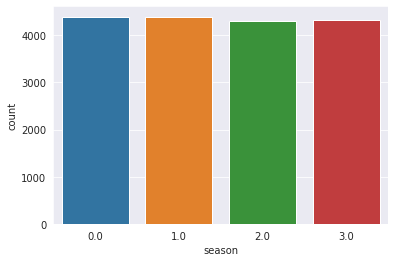

In [ ]:
# season


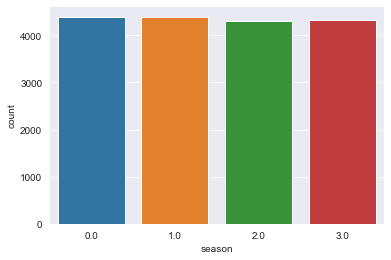

In [5]:
sns.countplot(data = df, x = 'season');

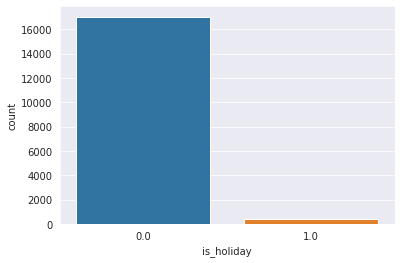

In [ ]:
# is_holiday


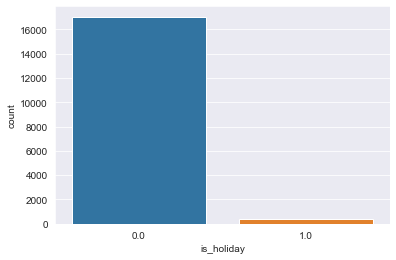

In [6]:
sns.countplot(data = df, x = 'is_holiday');

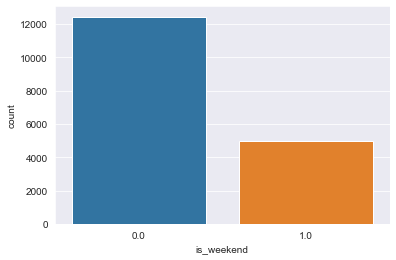

In [7]:
# is_weekend
sns.countplot(data = df, x = 'is_weekend');

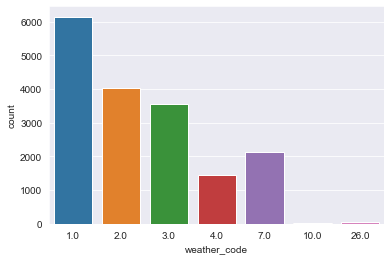

In [8]:
sns.countplot(data = df, x = 'weather_code');

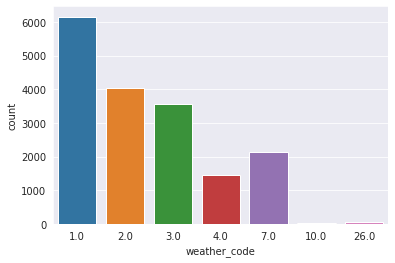

In [ ]:
# weather_code


### 5.Look at the data type of each variable, transform `timestamp` in type, and set it as index.

In [6]:
df.timestamp.dtype

dtype('O')

In [7]:
df.timestamp = df.timestamp.apply(pd.to_datetime)

In [8]:
df.timestamp.dtype.type

numpy.datetime64

In [9]:
df.set_index(df.timestamp, inplace=True)

In [10]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


- Tam 2 yillik bir timestamp var. `year, month, day_of_month, day_of_week, hour` bilgilerini alarak feature engineering yapalim

### 6.Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)

you can use strftime('%Y-%m') for year_mount

In [13]:
df['year'] = df.timestamp.dt.year

In [15]:
df.drop('Year', axis =1 , inplace= True)

In [29]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,days_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,31,6,0
2015-01-04 01:00:00,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,31,6,1
2015-01-04 02:00:00,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,2
2015-01-04 03:00:00,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,3
2015-01-04 04:00:00,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,31,6,4


In [23]:
df['month'] = df.timestamp.dt.month

In [22]:
df['day_of_month'] = df.timestamp.dt.days_in_month

In [26]:
df['days_of_week'] = df.timestamp.dt.day_of_week

In [28]:
df['hour'] = df.timestamp.dt.hour

In [ ]:
df['season'] = df.timestamp.dt.

In [9]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year_month,year,month,day_of_month,day_of_week,hour
timestamp,,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015-01,2015,1,4,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015-01,2015,1,4,6,4


### 7.Visualize the correlation with a heatmap

In [45]:
df2 = df.copy()

In [46]:
df2.reset_index(drop=True, inplace=True)

In [48]:
df2.drop('timestamp', axis = 1, inplace = True)

In [49]:
df2

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,days_of_week,hour
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,31,6,0
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,31,6,1
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,2
3,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,3
4,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,31,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,31,1,19
17410,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,31,1,20
17411,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,31,1,21
17412,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,31,1,22


<AxesSubplot:>

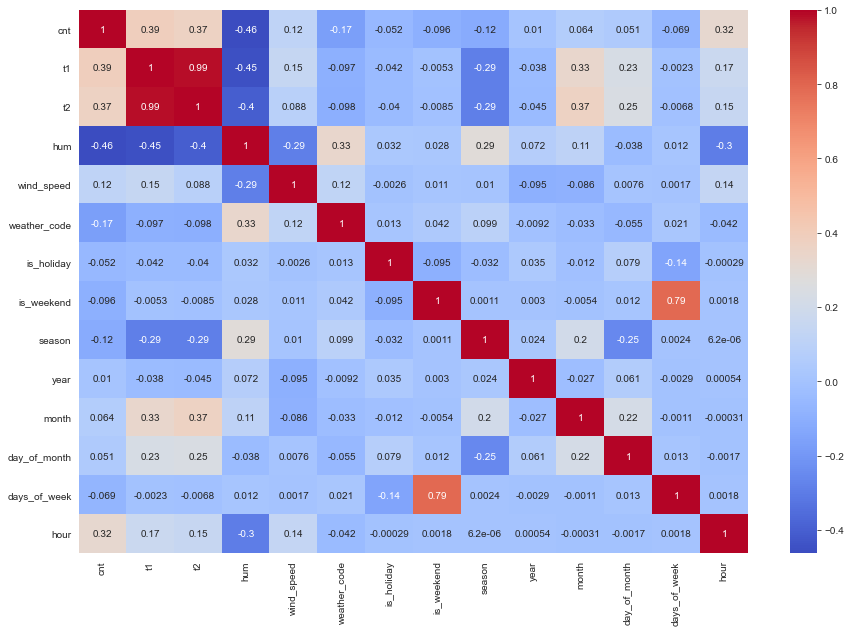

In [57]:
plt.figure(figsize = (15,10))
           
sns.heatmap(df2.corr(), cmap = 'coolwarm', annot = True)

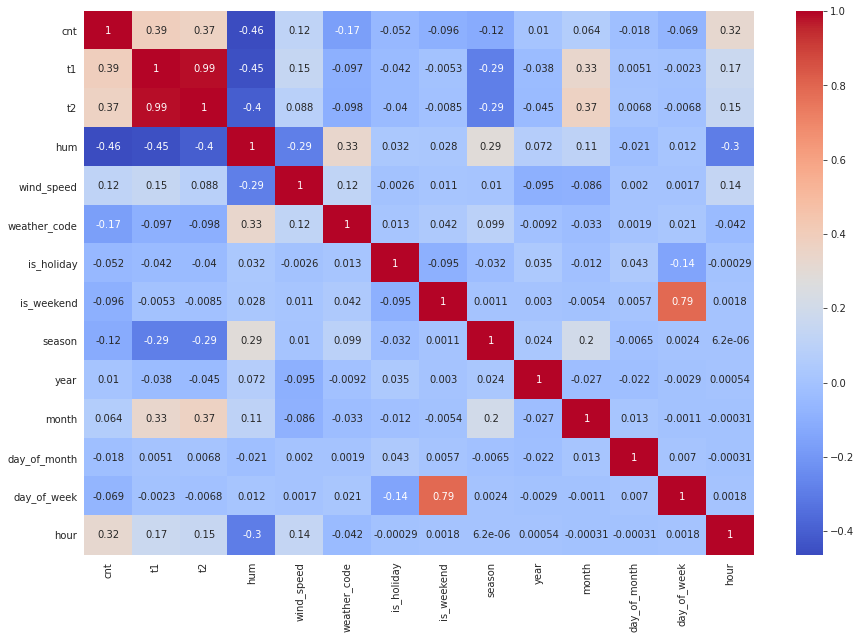

In [ ]:
# for all variables 


In [92]:
df.drop('timestamp', axis = 1, inplace = True)

In [93]:
df

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,day_of_month,days_of_week,hour
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,31,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,31,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,31,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,31,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,31,1,19
2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,31,1,20
2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,31,1,21


<AxesSubplot:>

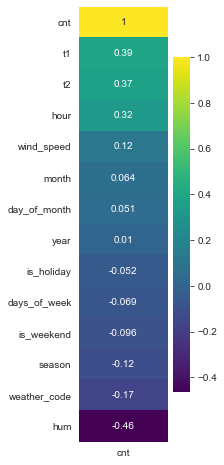

In [128]:
x1 = df.corr()[['cnt']].sort_values(by=['cnt'], ascending = False )
plt.figure(figsize= (2,8))
sns.heatmap(x1, annot = True, cmap = 'viridis')

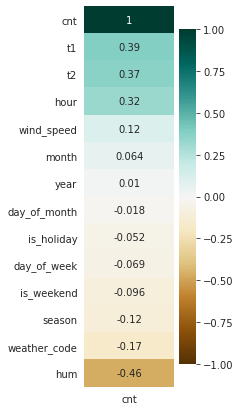

In [ ]:
# for the target variable


### 8. Visualize the correlation of the target variable and the other features with barplot

<AxesSubplot:>

<Figure size 1152x576 with 0 Axes>

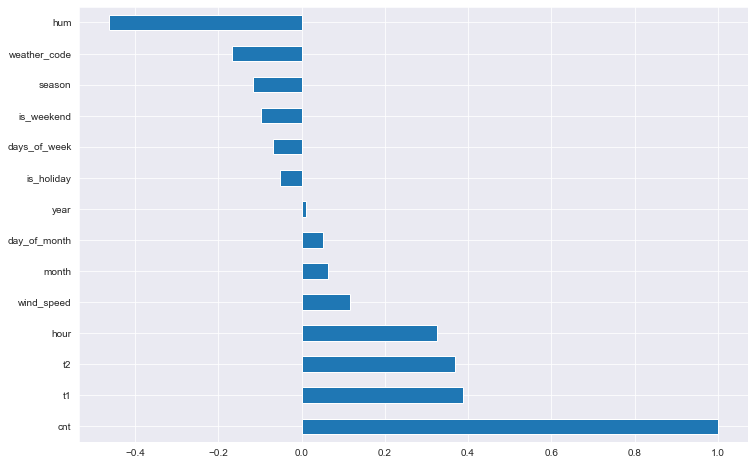

In [168]:
plt.figure(figsize=(16,8))
x1.plot.barh(figsize=(12,8), legend = False)

,cnt
cnt,1.000000
t1,0.388798
t2,0.369035
hour,0.324423
wind_speed,0.116295
month,0.063757
day_of_month,0.050570
year,0.010046
is_holiday,-0.051698
days_of_week,-0.068688


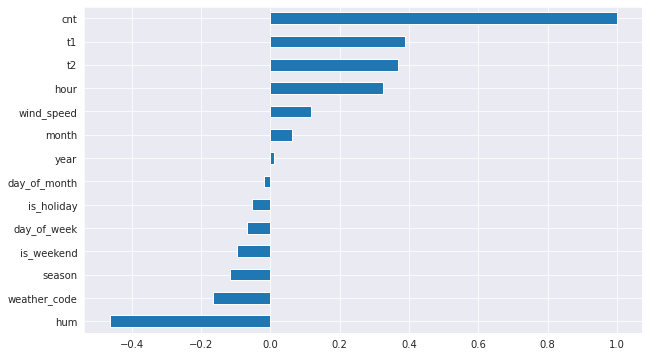

In [ ]:
#with pandas


### 9.Plot bike shares over time use lineplot

In [ ]:
sns.barplot(data= df, x = )

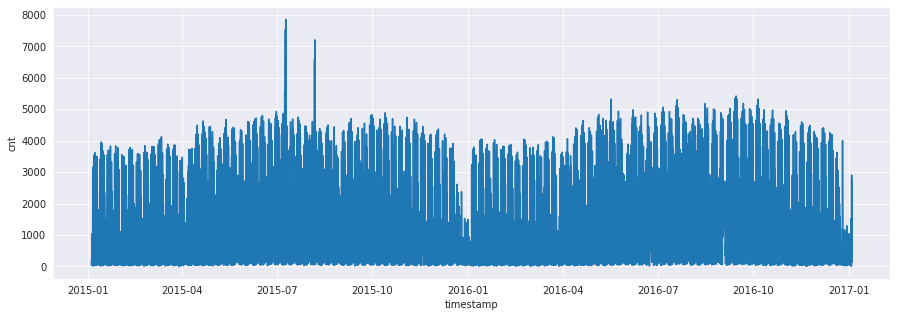

### 10.Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot)

In [172]:
df['year_month'] = df['year'].astype(str) + "-" + df.month.astype(str)
df.year_month

timestamp
2015-01-04 00:00:00    2015-1
2015-01-04 01:00:00    2015-1
2015-01-04 02:00:00    2015-1
2015-01-04 03:00:00    2015-1
2015-01-04 04:00:00    2015-1
                        ...  
2017-01-03 19:00:00    2017-1
2017-01-03 20:00:00    2017-1
2017-01-03 21:00:00    2017-1
2017-01-03 22:00:00    2017-1
2017-01-03 23:00:00    2017-1
Name: year_month, Length: 17414, dtype: object

In [182]:
df_new = df.copy()
df_new['year_month'] = df_new.index.strftime('%Y-%m')
df_new.year_month

timestamp
2015-01-04 00:00:00    2015-01
2015-01-04 01:00:00    2015-01
2015-01-04 02:00:00    2015-01
2015-01-04 03:00:00    2015-01
2015-01-04 04:00:00    2015-01
                        ...   
2017-01-03 19:00:00    2017-01
2017-01-03 20:00:00    2017-01
2017-01-03 21:00:00    2017-01
2017-01-03 22:00:00    2017-01
2017-01-03 23:00:00    2017-01
Name: year_month, Length: 17414, dtype: object

In [176]:
df.Month

timestamp
2015-01-04 00:00:00    1
2015-01-04 01:00:00    1
2015-01-04 02:00:00    1
2015-01-04 03:00:00    1
2015-01-04 04:00:00    1
                      ..
2017-01-03 19:00:00    1
2017-01-03 20:00:00    1
2017-01-03 21:00:00    1
2017-01-03 22:00:00    1
2017-01-03 23:00:00    1
Name: Month, Length: 17414, dtype: int64

In [185]:
df_new.year_month.value_counts()

2015-05    744
2016-01    744
2015-08    744
2016-12    744
2016-05    744
2016-10    743
2016-07    741
2016-08    740
2015-12    740
2015-07    740
2015-03    739
2015-10    736
2016-03    729
2016-04    719
2016-11    719
2015-04    719
2015-06    717
2015-11    711
2015-09    711
2016-06    705
2016-02    688
2016-09    683
2015-02    671
2015-01    671
2017-01     72
Name: year_month, dtype: int64

In [193]:
my_x = df_new.year_month.value_counts().sort_index()
my_y = df_new.cnt.groupby(df_new['year_month']).sum()

In [199]:
my_y.shape

(25,)

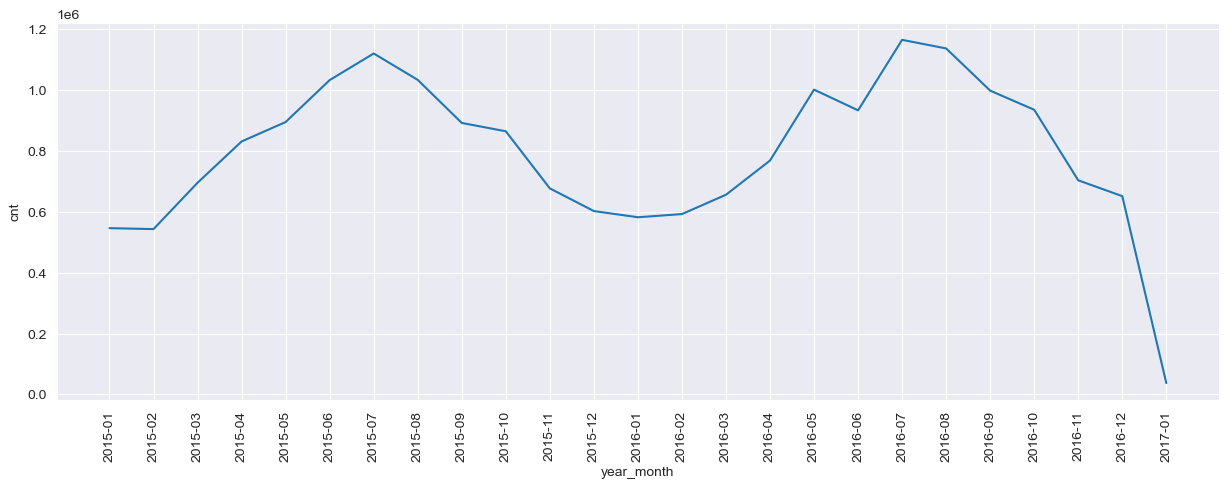

In [209]:
plt.figure(figsize = (15, 5), dpi = 100)
sns.lineplot(x = my_x.index, y = my_y.values)
plt.xticks(rotation = 90);
plt.xlabel('year_month')
plt.ylabel('cnt');

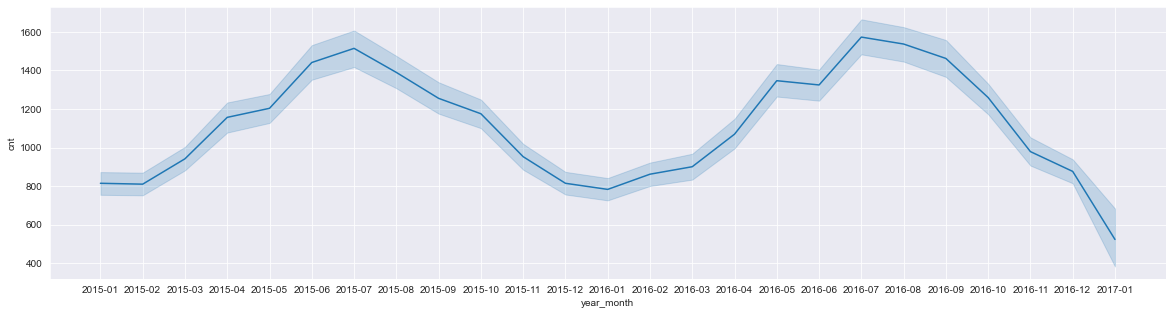

In [215]:
plt.figure(figsize=(20,5))

sns.lineplot(data = df_new, x = 'year_month', y = 'cnt');

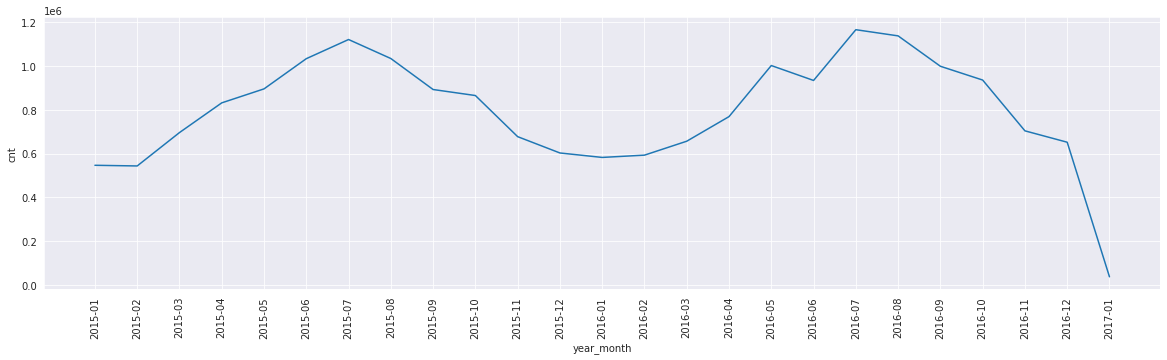

In [ ]:
# with lineplot


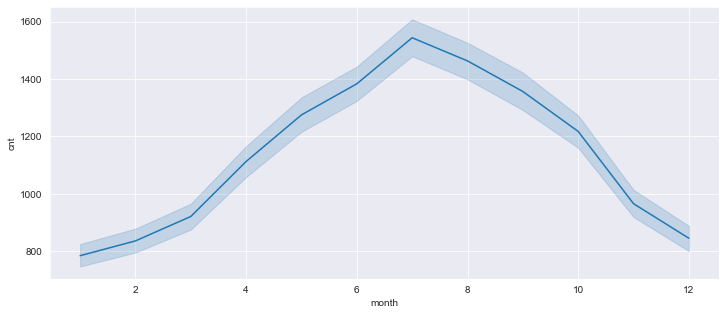

In [212]:
plt.figure(figsize=(12,5))
sns.lineplot(data = df_new, x = 'month', y = 'cnt');

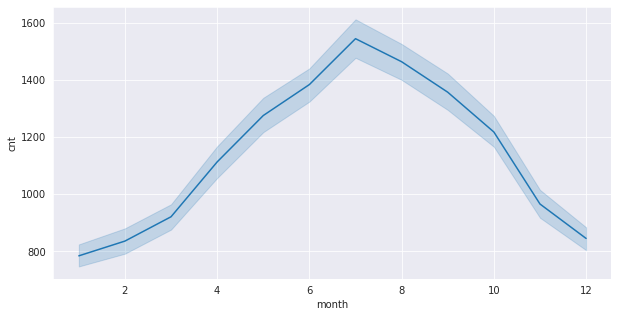

In [ ]:
# with lineplot


<AxesSubplot:xlabel='month', ylabel='cnt'>

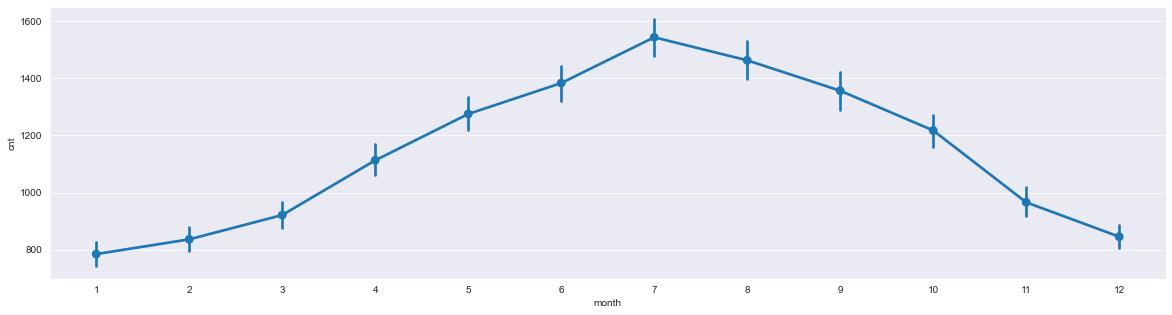

In [219]:
plt.figure(figsize=(20,5))

sns.pointplot(x='month', y = 'cnt', data = df)

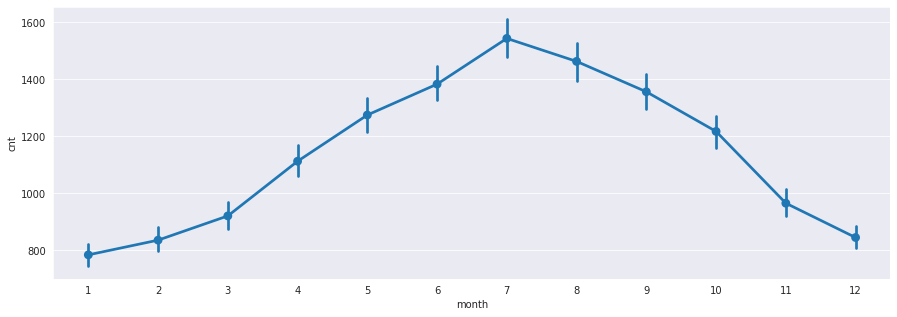

In [ ]:
# with pointplot


<AxesSubplot:xlabel='month', ylabel='cnt'>

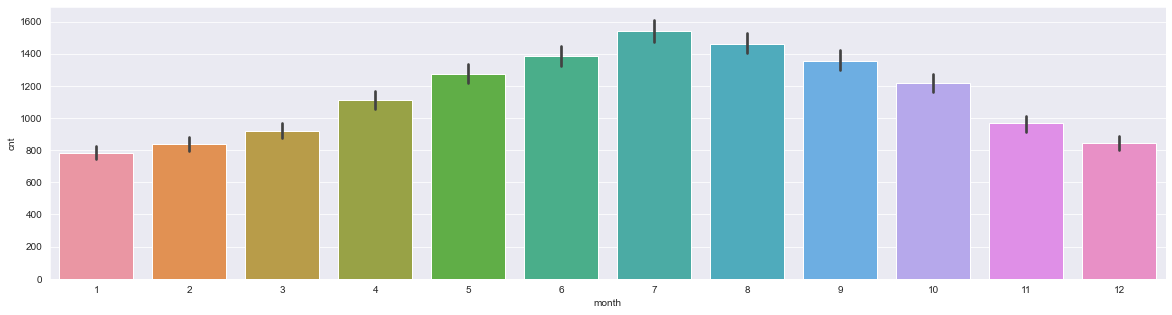

In [220]:
plt.figure(figsize=(20,5))

sns.barplot(x='month', y = 'cnt', data = df)

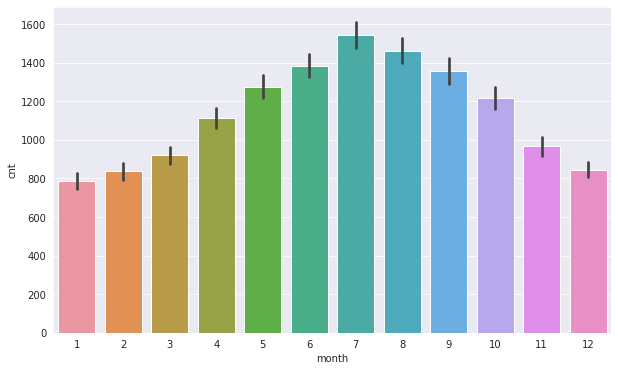

In [ ]:
# with barplot


### 11.Plot bike shares by hours on (holidays, weekend, season)

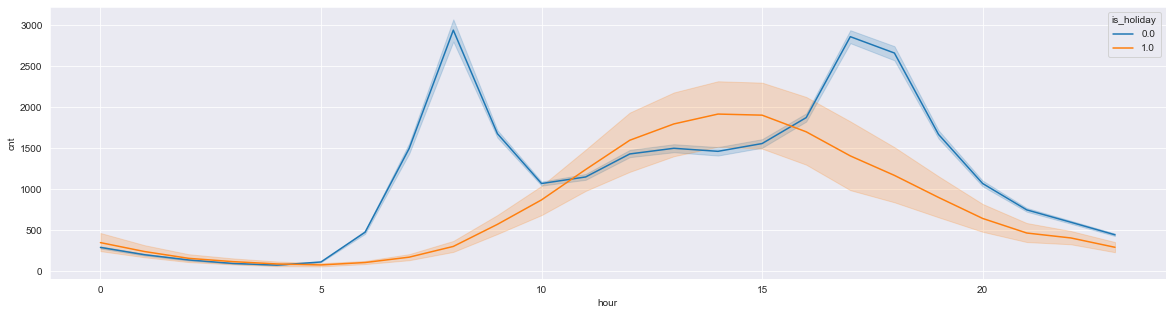

In [222]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_new, x = 'hour', y = 'cnt', hue = 'is_holiday');

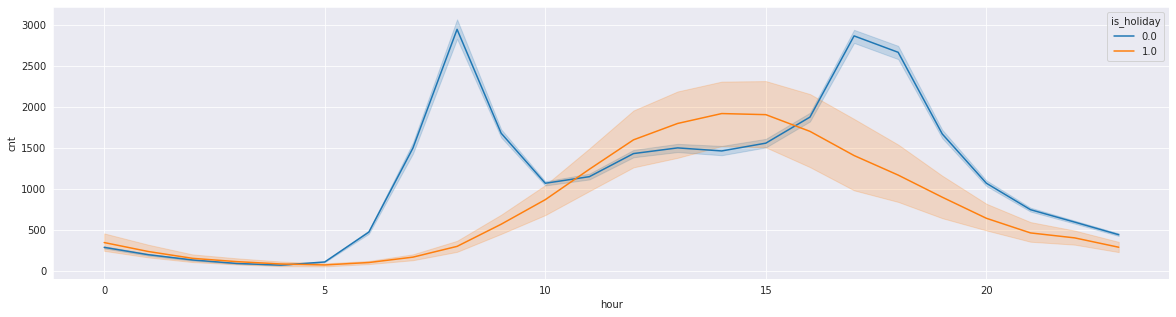

In [ ]:
# with lineplot (*whether it is a holiday or not*)


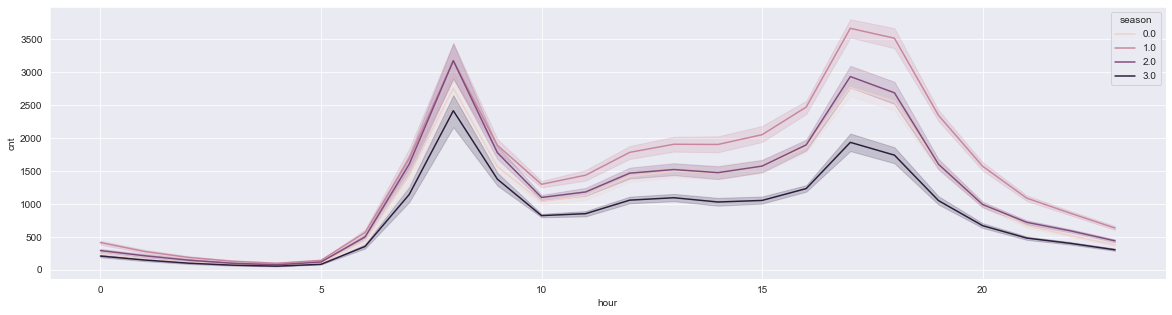

In [223]:
plt.figure(figsize=(20,5))
sns.lineplot(data = df_new, x = 'hour', y = 'cnt', hue = 'season');

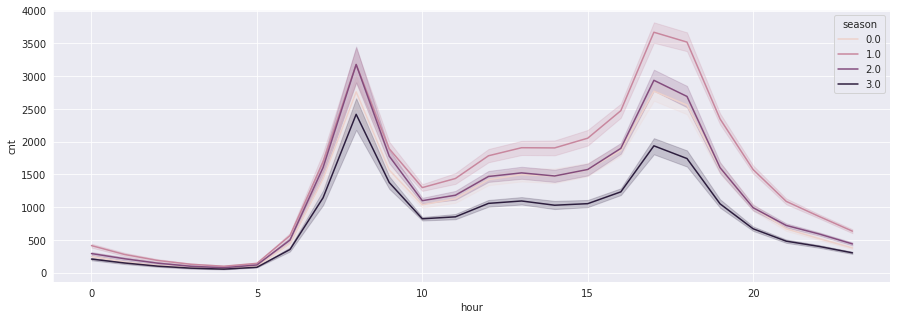

In [ ]:
# with lineplot (*You may want to see seasonal breakdowns*)


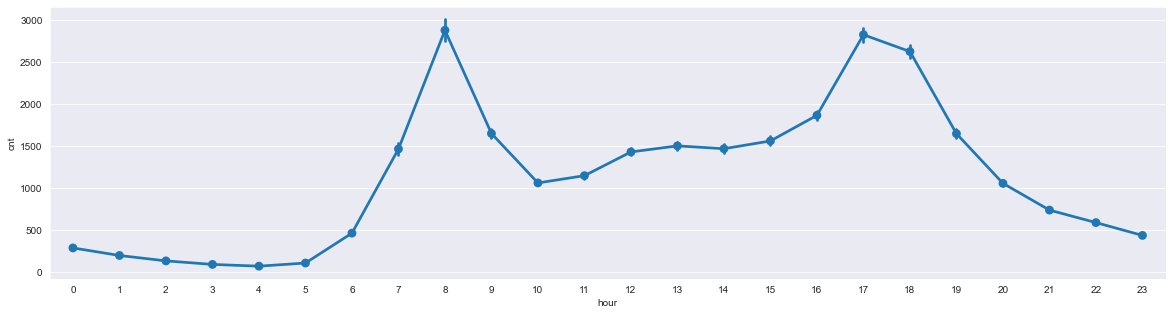

In [224]:
plt.figure(figsize=(20,5))
sns.pointplot(data = df_new, x = 'hour', y = 'cnt');

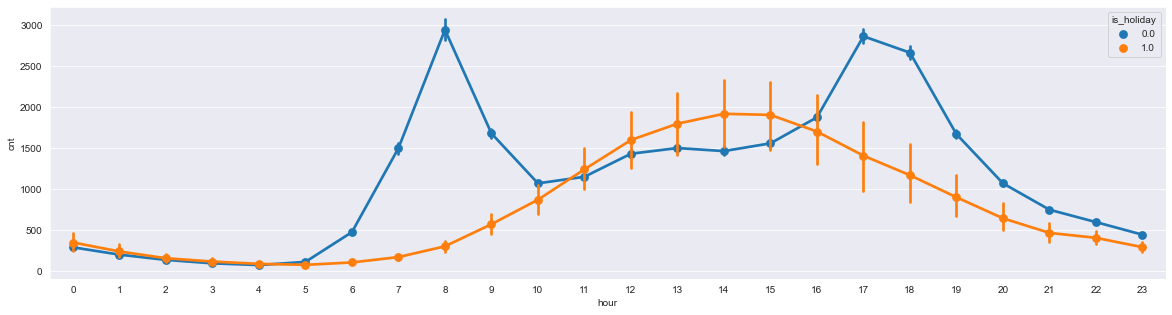

In [226]:
plt.figure(figsize=(20,5))
sns.pointplot(data = df_new, x = 'hour', y = 'cnt', hue = 'is_holiday');

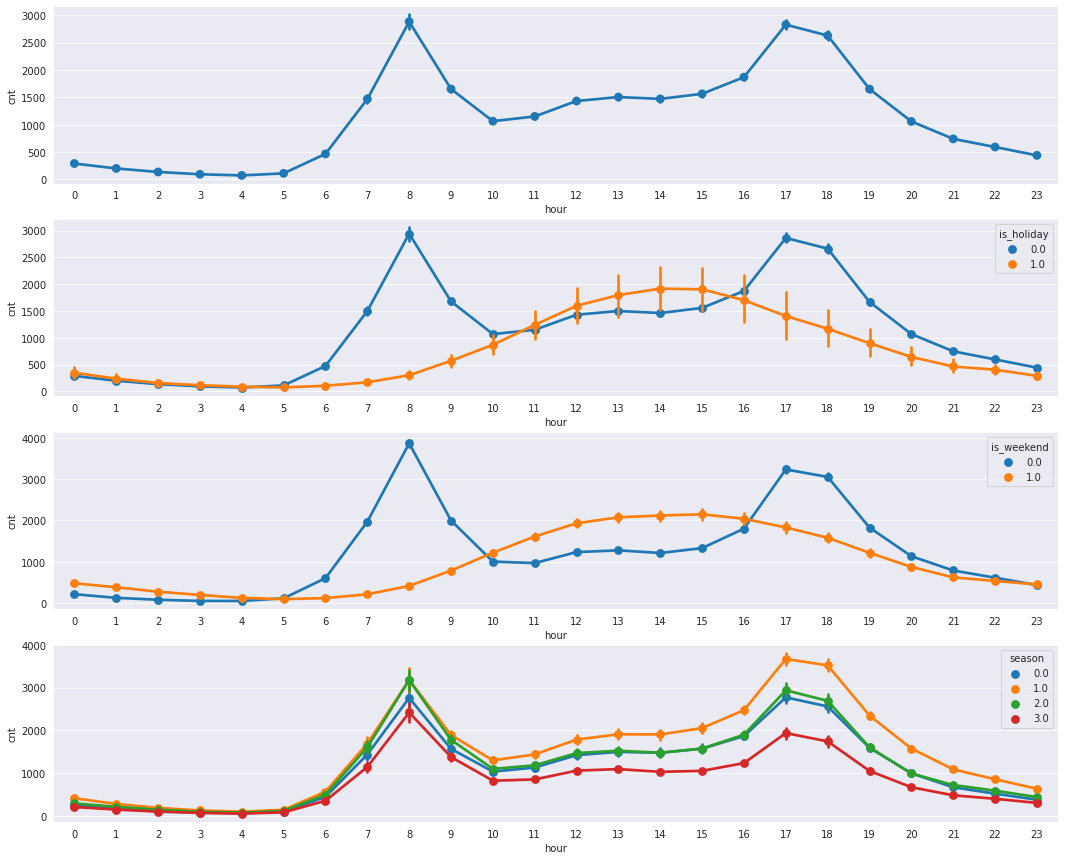

In [ ]:
# with pointplot


### 12.Plot bike shares by day of week
- You may want to see whether it is a holiday or not

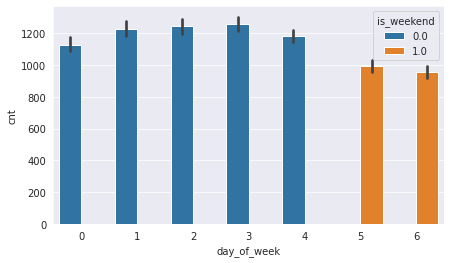

In [ ]:
# with barplot


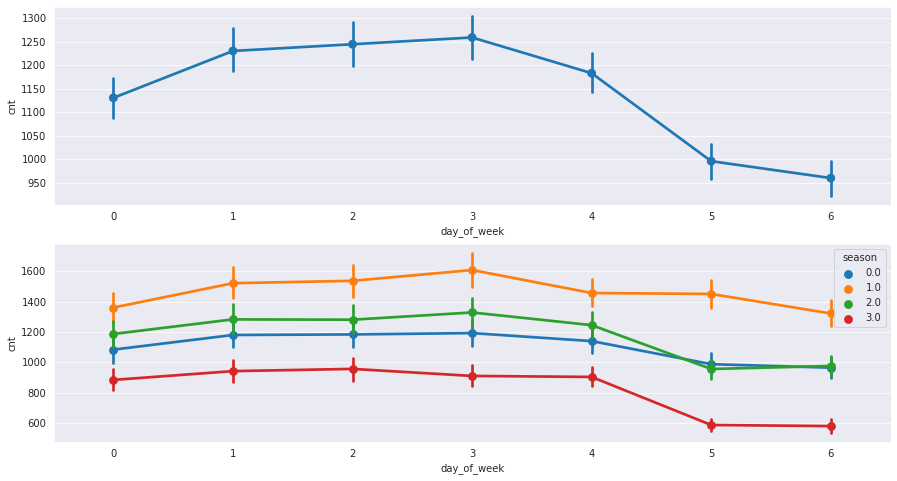

In [ ]:
# with pointplot


### 13.Plot bike shares by day of month

day_of_month,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
cnt,1077,1088,1128,1144,1141,1211,1194,1223,1261,1157,1204,1167,1139,1124,1176,1141,1182,1179,1153,1116,1126,1128,1174,1054,1191,1082,1131,1063,1080,1156,968


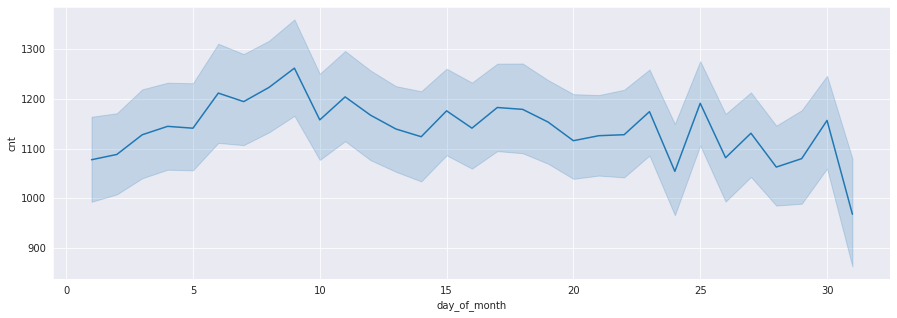

In [ ]:
#with lineplot



### 14.Plot bike shares by year
### Plot bike shares on holidays by seasons

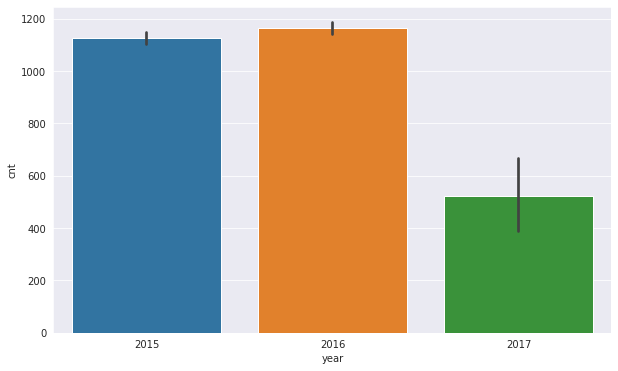

In [11]:
# with barplot


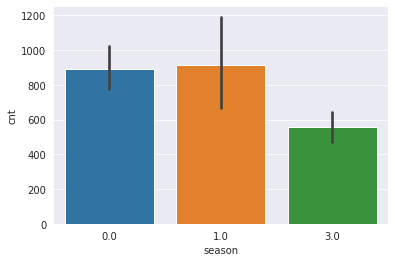

In [12]:
# with barplot

### 15.Visualize the distribution of bike shares by weekday/weekend with piechart and barplot

0.0    12444
1.0     4970
Name: is_weekend, dtype: int64

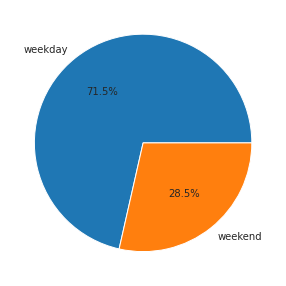

In [ ]:
# pie chart

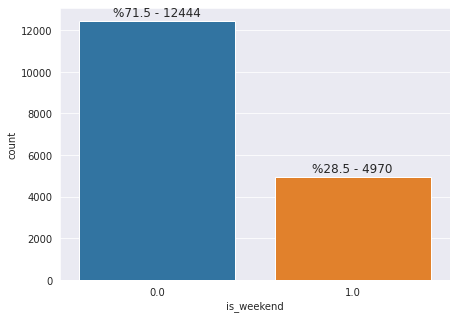

In [ ]:
# with countplot



### 16.Plot the distribution of weather code by seasons

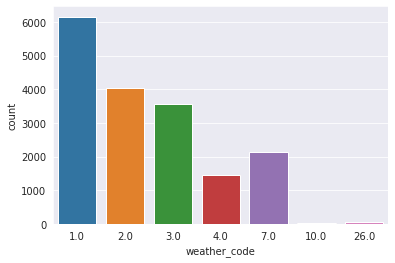

In [ ]:
# with countplot


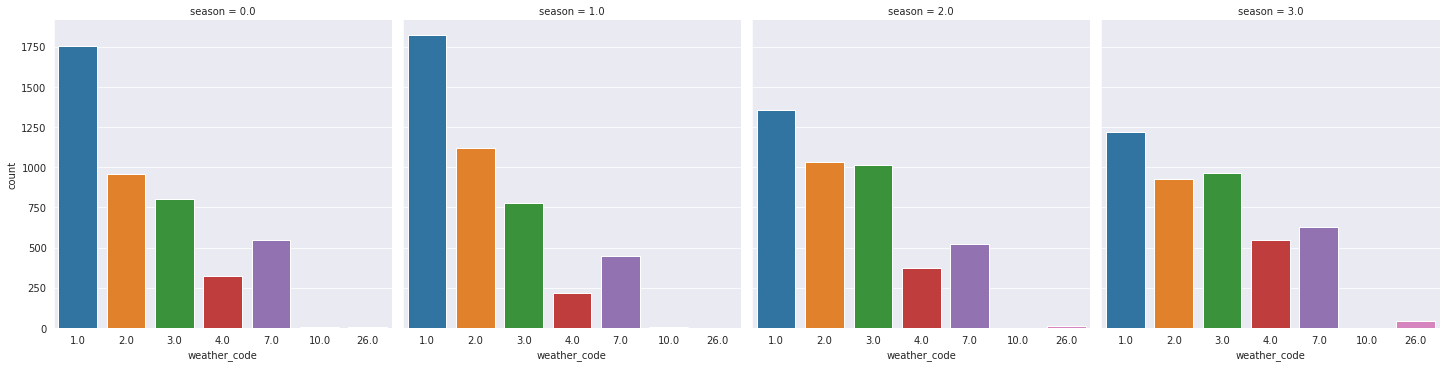

In [ ]:
# with catplot


### 17.Visulaize all the continuous variables with histogram and scatterplot

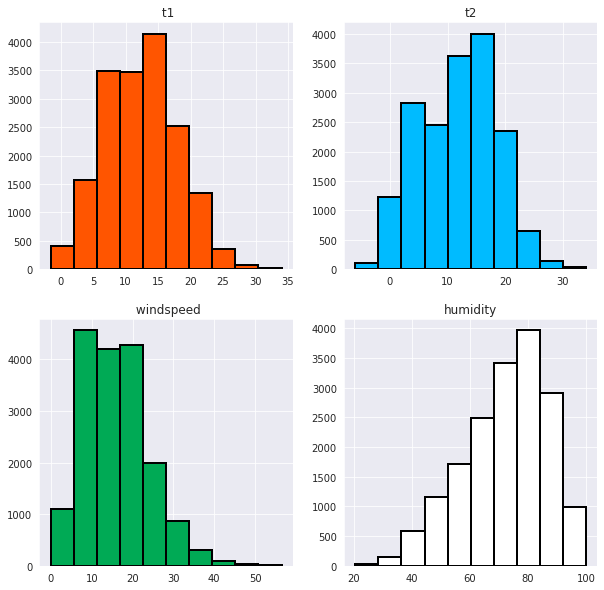

In [ ]:
# matplotlip hist


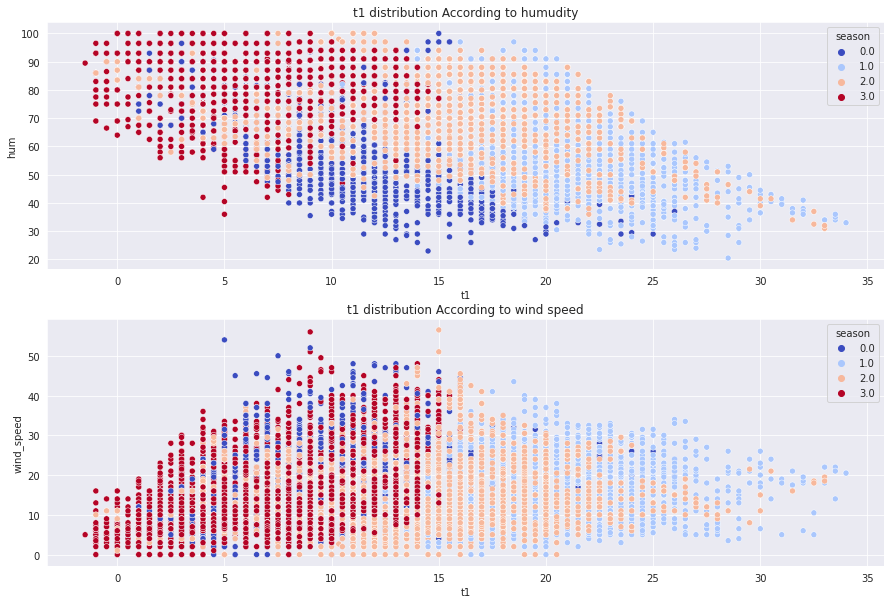

In [ ]:
# matplotlib scatterplot

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___